# Assignment

You've seen the matplotlib examples in class. Explore the library and create your at least 3 plot of personal data (same dataset, but with 3 different visuals). Personal data can be the abstract or literal. Here are some examples: 

* collections of plants you own 
* food you ate during the day 
* kinds of exercises and how often you do them 
* emotions over time during a day 
* your coin collection 
* stuff that is in your fridge 
* your list of most frequent restaurants and cuisine 

See 2 examples below of my nail polish collection! 
Documentation: https://matplotlib.org/

---

# Favorite places to bike
I decided to take my favorite places from last week's assignment and plot them three different ways.

In [69]:
import numpy as np
import math

In [23]:
#importing the library as shortname 
import matplotlib.pyplot as plt 
# to choose a random memory and to find location data

import random, googlemaps
import config

# to calculate distance between locations
import haversine as hs

# API Key from Google Cloud Console restricted to geocoding; 
# lives in config.py in .gitignore
# so it's not public to bots scraping GitHub for API keys
apikey = config.GOOGLE_API_KEY
gmaps = googlemaps.Client(key=f'{apikey}')


# my location hidden in config.py as well
# look up with Google; output the lat/long
your_google = gmaps.geocode(config.MY_LOC)
your_latlng = [your_google[0]['geometry']['location']['lat'], your_google[0]['geometry']['location']['lng']]


# Create a class for favorite places in New York City
# Initializer has lists to store Google geocode location info, 
# lat/long extracted from that info, and memories
# Methods: get location data, find your distance from a place, find the neighborhood;
# make new memories, and remember them randomly
class Place:
    
    # initializer   
    def __init__(self,name):
        self.name = name
        self.google = []
        self.latlng = []
        self.memories = []
        self.activities = []
        self.distance = 0
    
#     # add a memory of the place
#     def new_memory(self):
#         memory = input("Tell me a memory of this place: ")
#         self.memories.append(memory)

#     # remember a memory of the place
#     def remember(self):
#         print(random.choice(self.memories))
    
    # find the lat long of the place and its distance from me
    def locate(self):
        self.google = gmaps.geocode(f"{self.name}")
        self.latitude = self.google[0]['geometry']['location']['lat']
        self.longitude = self.google[0]['geometry']['location']['lng']
        self.latlng = [self.latitude, self.longitude]    
        self.distance = round(hs.haversine(self.latlng,your_latlng),2)        
#         print(f"You are {self.distance} miles away from {self.name}.")
    
#     # find the neighborhood of the place
#     def neighborhood(self):
#         neighb = self.google[0]['address_components'][2]['long_name']
#         print(f"{self.name} is in {neighb}.")

# Create some places
park = Place('Bush Terminal Pier Park')
cemetery = Place('Green-wood Cemetery')
bottles = Place('Dead Horse Bay')
pier = Place('Louis J Valentino Pier, Red Hook')
beach = Place('Jacob Riis Park')

# Get the location data
park.locate()
cemetery.locate()
bottles.locate()
pier.locate()
beach.locate()

In [90]:
distances = {
    park.name : park.distance,
    cemetery.name : cemetery.distance,
    bottles.name : bottles.distance,
    pier.name : pier.distance,
    beach.name : beach.distance,
}

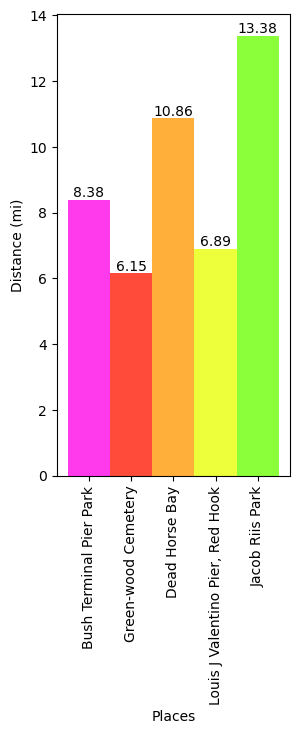

In [46]:
fig, ax = plt.subplots(figsize=(3,6))
bars = plt.bar(
    range(len(distances)), 
    list(distances.values()), 
    align='center',
    width=1,
    color=[
        '#ff3aed',
        '#ff4c3a',
        '#ffaf3a',
        '#edff3a',
        '#8bff3a',
    ]
)

plt.xticks(
    range(len(distances)), 
    list(distances.keys()), 
    rotation = 90
)
plt.xlabel("Places")
plt.ylabel("Distance (mi)")
ax.bar_label(bars)

plt.show()

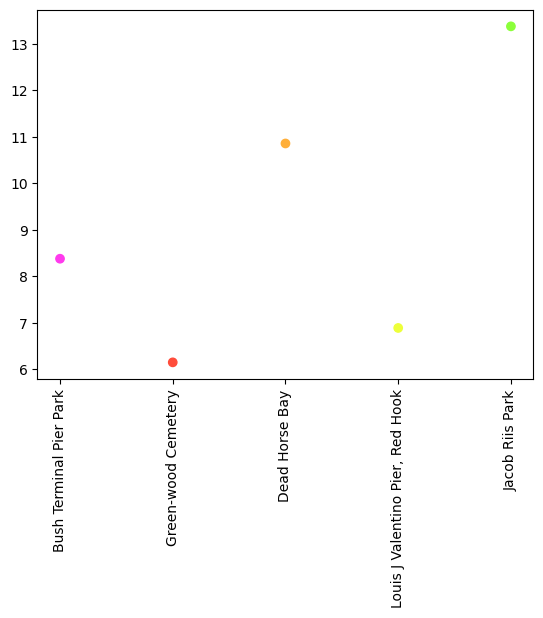

In [91]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter
plt.scatter(
    range(len(distances)), 
    list(distances.values()), 
    color=[
        '#ff3aed',
        '#ff4c3a',
        '#ffaf3a',
        '#edff3a',
        '#8bff3a',
    ]
)
plt.xticks(
    range(len(distances)), 
    list(distances.keys()), 
    rotation = 90
)
plt.show()

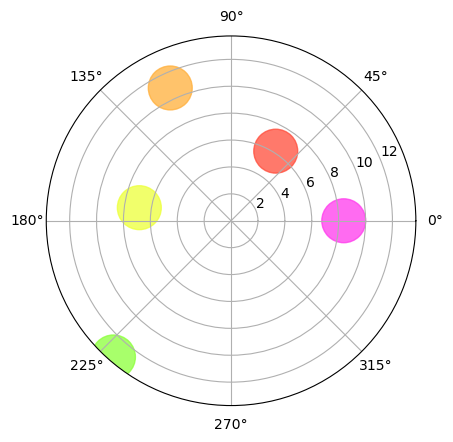

In [92]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
r = 5
theta = math.degrees(360/5) * np.pi
area = 200 * r
colors = [
        '#ff3aed',
        '#ff4c3a',
        '#ffaf3a',
        '#edff3a',
        '#8bff3a',
    ]

c = ax.scatter(
    range(len(distances)), 
    list(distances.values()), 
    color=[
        '#ff3aed',
        '#ff4c3a',
        '#ffaf3a',
        '#edff3a',
        '#8bff3a',
    ],
    s = area,
    cmap = 'hsv',
    alpha = 0.75
)
# plt.xticks(
#     range(len(distances)), 
#     list(distances.keys()), 
#     rotation = 90
# )
# plt.show()